## Task 1
There are N empty glasses with a capacity of 1, 2, ..., N
liters (there is exactly one glass of each unique
capacity). You want to pour exactly K liters of water
into glasses. Each glass may be either full or empty (a
glass cannot be partially filled). What is the minimum
number of glasses that you need to contain K liters of
water?
Write a function:
def solution (N, K)
that, given two integers N and K, returns the minimum
number of glasses that are needed to contain exactly
K liters of water. If it is not possible to pour exactly K
liters of water into glasses then the function should
return -1.
Examples:
1. Given N = 5 and K = 8, the function should return 2.
There are five glasses of capacity 1, 2, 3, 4 and 5. You
can use two glasses with capacity 3 and 5 to hold 8
liters of water.
2. Given N = 4 and K = 10, the function should return 4.
You must use all the glasses to contain 10 liters of
water.
3. Given N = 1 and K = 2, the function should return -1.
There is only one glass with capacity 1, so you cannot
pour 2 liters of water.
4. Given N = 10 and K = 5, the function should return 1.
You can use the glass with capacity 5.

Write an efficient algorithm for the following
assumptions:
- N is an integer within the range [1...1,000,000];
- K is an integer within the range [1...1,000,000,000].

In [1]:
def solution(N, K):
    if K<N:
        return 1
    if K>N*(N+1)/2:
        return -1
    
    count = 0
    leftover = K
    current = N

    while leftover > current:
        count+=1
        leftover -= current
        current -= 1

    return count+1

print(solution(5,8))
print(solution(4,10))
print(solution(1,2))
print(solution(10,5))

N = int(1e6)
K = int(1e9)
print(solution(N,K))
    

2
4
-1
1
1001


## Task 2
Your task is to finish the implementation of the crack_password method in the Utilities class:
class Utilities:
```
def crack_password(self,
        hash_to_crack: str, length: int,
        contains letters: bool, contains_digits: bool,
        special_symbols: [str], common_passwords_path: str) -> Tuple [bool, str]:
    pass
```
The goal of this method is to crack a password in a brute force manner based on a provided SHA256 hash of a password and
additional details about this password. The parameters of crack_password have the following meaning:
- hash_to_crack - SHA256 hash of the password to crack. It takes the form of hexadecimal digits, e.g.:
9834876dcfb05cb167a5c24953eba58c4ac89b1adf57f28f2f9d09af107ee8f0.
- length - The length of the password.
- contains letters - True
if the password contains upper- or lowercase letters, i.e. a, b,..., z, A, B, ..., Z.
- contains_digits - True
if the password contains digits, i.e.: 0, 1,..., 9.
special_symbols
- an array of special symbols used in the password, e.g.: ['!','$',...]
- common_passwords_path - the path to a text file of the most common passwords. The given file will contain 1 or
more passwords, each on a new line. This path may not be provided and in this case common_passwords_path might
be set to None.

Based on the provided hints, crack_password
should generate all possible passwords. For each generated password, the
SHA256 hash should be calculated and compared with the SHA256 hash of the original password. If they match, then
crack_password should return a tuple in the form: (True, cracked_password). E.g.: (True, 'password1') 0,
(True, 'df&^8df')  . If it is not possible to crack the password, then crack_password should return the following
tuple: (False, None).

#### Example
If crack_password is called with the following parameters:
- length = 3
- contains_letters = False
- contains digits = True D
- special_symbols = [] D
- common_passwords_path = 'common_passwords.txt'
and common_passwords.txt contains the following:
```
abc
ххх
```
then some passwords that should be generated and checked are:
- 'abc'
- 'xxx'
- '000'
- '001'
- '002'
- ...
- '999'

#### Hints
- You can use Python 3.8.2.
- To calculate the SHA256 you may use the hashlib library.
- Start by checking the most common passwords (see common_passwords_path O ).
- You can assume that the file provided by common_passwords_path exists if this parameter is not None
- In real life, a brute force password attack can take hours or days. In this task it will not take more than a few seconds.

In [2]:
import hashlib
from typing import Tuple
import random

class Utilities:
    def crack_password(self,
                       hash_to_crack: str, length: int,
                       contains_letters: bool, contains_digits: bool,
                       special_symbols: [str], common_passwords_path: str) -> Tuple[bool, str]:
        
        # check common passwords
        passwords = []
        if common_passwords_path:
            file = open(common_passwords_path, 'r')
            passwords = file.read().split('\n')
            file.close()
        for password in passwords:
            hash_password = hashlib.sha256(password.encode()).hexdigest()
            if hash_password == hash_to_crack:
                return True, password

        # brute force
        symbols = special_symbols
        if contains_letters: symbols += list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')
        if contains_digits: symbols += list('0123456789')
        n_symbols = len(symbols)

        for _ in range(int(1e6)):
            indices = [random.choice(range(n_symbols)) for _ in range(length)]
            password = ''.join(map(symbols.__getitem__, indices))
            hash_password = hashlib.sha256(password.encode()).hexdigest()
            if hash_password == hash_to_crack:
                return True, password

        return False, None


password = 'wd4'
hash_to_crack = hashlib.sha256(password.encode()).hexdigest()  
Utilities().crack_password(
    hash_to_crack,len(password),
    True,True,[],'common_passwords.txt'
    )


(True, 'wd4')

## Task 3

Two products, product A and product B, have recently been advertised on social media. The campaign was run as an A/B test, a form of a randomized experiment in which some users saw the advert for product A and the others that for product B. Your task is to analyze the experiment's results using Bayesian methods. This approach is often preferred to traditional statistical hypothesis tests as it makes it directly possible to quantify how thuch better one advertising campaign was compared with the other.

You are given a dataframe called `clicks` in which one row represents one user. There are two columns: `product` (either "A" or "B" ), denoting which advert this particular user saw, and `banner_clicked`, a binary indicator of whether the user clicked on the advert:

For each product separately, you will need to find the posterior distribution of its click rate and sample from it. From domain knowledge and your previous work, you know that a Beta distribution with `alpha=1` and `beta=5`. (Beta(1, 5)) is generally good a priori for the click rate in the market you are analyzing. It can be shown that in this case, the posterior distribution will be:

`Beta(alpha + num_clicks, beta - num_clicks + num_exposures)`

where `num_clicks` is the number of clicks for a given product and `num_exposures` is the number of times the advert for this product was displayed.

#### Requirements

Write a function called `bayes_ab_test` according to the following requirements:
- Assign the clicks for each product to two separate variables by slicing the data frame accordingly to obtain `a_clicks` and `b_clicks`.
- For each product, simulate 10,000 draws from its corresponding posterior distribution. Set the distribution's parameters according to the formula above.
- Return a dictionary with five fields:

    - `a_clicks`, a pandas series with `banner_clicked` values for product A; 
    - `b_clicks`, a pandas series with `banner_clicked` values for product B; 
    - `a_posterior_mean`, a float, the mean of the posterior draws for product A click-through rate; 
    - `b_posterior_mean`, a float, the mean of the posterior draws for product B click-through rate; 
    - `prob_a_better`, a float denoting the probability that A has a better click-through rate than B.
- Do not change or remove the random seed set to `1984` at the beginning of the code.

#### Hints
- Use `np.random.beta()` to sample from the beta distribution.
- To calculate the probability that A has a better click rate than B, compute the percentage of cases in which the draw for A was larger than the draw for B.

#### Available packages/libraries
You may use all of:
- Python 3.8
- numpy 1.23.3 
- pandas 1.3.5

{'a_clicks': 0       0
 2       0
 4       0
 5       0
 7       0
        ..
 9994    0
 9995    0
 9996    0
 9997    0
 9998    0
 Name: banner_clicked, Length: 5028, dtype: int64,
 'b_clicks': 1       0
 3       0
 6       0
 8       0
 13      1
        ..
 9985    0
 9987    0
 9988    0
 9990    1
 9999    0
 Name: banner_clicked, Length: 4972, dtype: int64,
 'a_posterior_mean': 0.13012728095695286,
 'b_posterior_mean': 0.11674620299366643,
 'prob_a_better': 0.9793}

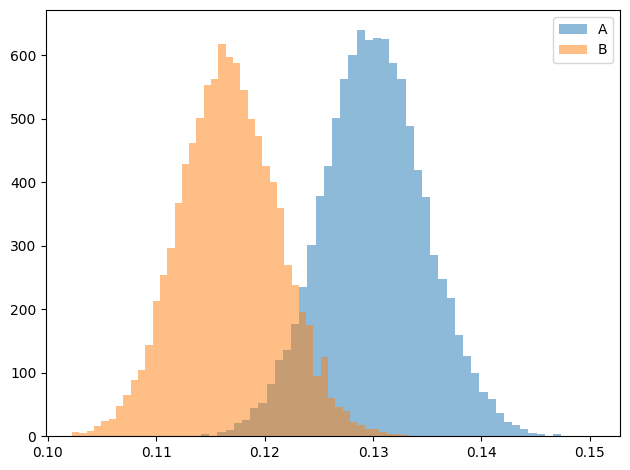

In [3]:
import pandas as pd
import numpy as np

def bayes_ab_test(seed=1984, plot=False):
    np.random.seed(seed)
    clicks = pd.read_csv("clicks.csv")

    # Do not change the lines above. Write your solution below.
    a_clicks = clicks[clicks['product'] == 'A']['banner_clicked']
    b_clicks = clicks[clicks['product'] == 'B']['banner_clicked']

    a_num_clicks = a_clicks.sum()
    b_num_clicks = b_clicks.sum()

    a_posterior = np.random.beta(
        1 + a_num_clicks, 
        5 - a_num_clicks + len(a_clicks), 
        10000)
    b_posterior = np.random.beta(
        1 + b_num_clicks, 
        5 - b_num_clicks + len(b_clicks), 
        10000)
    
    if plot:
        import matplotlib.pyplot as plt
        _ = plt.hist(a_posterior, bins=50, label='A', alpha=0.5)
        _ = plt.hist(b_posterior, bins=50, label='B', alpha=0.5)
        plt.legend()
        plt.tight_layout()

    return {
        'a_clicks': a_clicks,
        'b_clicks': b_clicks,
        'a_posterior_mean': a_posterior.mean(),
        'b_posterior_mean': b_posterior.mean(),
        'prob_a_better': (a_posterior > b_posterior).mean(),
        }

bayes_ab_test(np.random.randint(1000),True)